<a href="https://colab.research.google.com/github/crislainesc/Aprendizado-de-Maquina-na-Pratica/blob/master/Arvore_De_Decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Previsão de insuficiência cardíaca**



*   Data set com informações clínicas que podem permitir a criação de um modelo capaz de prever a mortalidade por insuficiência cardíaca.
*   [Heart Failure Prediction](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)
*   12 características clínicas que podem prognosticar eventos de morte.
*   299 instâncias.

**Montando ambiente no Google Drive**

In [147]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**1. Importando Bibliotecas**

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

**2. Carregamento dos dados**

In [149]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Semana 2/heart_failure.csv')

In [150]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [151]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

**3. Limpeza e organização dos dados**

Todas as colunas do data set são importantes para que o modelo seja capaz de dar o prognóstico do evento de morte, apenas será verificado se há dados faltantes ou ruídos.

In [152]:
data.dropna()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


**4. Re-escala dos dados**

In [153]:
data = (data - data.min())/(data.max() - data.min())

**5. Organizando dados para modelagem**

In [154]:
x = data.iloc[:,1:]
x.head()

,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000,1.0
1,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117,1.0
2,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676,1.0
3,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676,1.0
4,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235,1.0


In [155]:
y = data.DEATH_EVENT
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: DEATH_EVENT, dtype: float64

**Dividindo os dados em treino e teste**

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [158]:
x_train.head()

,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
71,0.0,0.071319,1.0,0.318182,0.0,0.117469,0.044944,0.742857,1.0,1.0,0.238434,0.0
200,1.0,0.222506,0.0,0.469697,0.0,0.058068,0.022472,0.685714,1.0,0.0,0.647687,0.0
274,1.0,0.029855,1.0,0.242424,0.0,0.151412,0.056180,0.685714,1.0,1.0,0.857651,0.0
135,0.0,0.071319,0.0,0.393939,0.0,0.288833,0.076404,0.685714,1.0,0.0,0.366548,0.0
176,0.0,0.178107,0.0,0.393939,0.0,0.096860,0.056180,0.628571,1.0,1.0,0.508897,0.0


In [159]:
y_train.head()

71     0.0
200    0.0
274    0.0
135    0.0
176    0.0
Name: DEATH_EVENT, dtype: float64

**5. Definindo algoritmo de aprendizado**

In [160]:
from sklearn.tree import DecisionTreeClassifier

In [161]:
classifier = DecisionTreeClassifier()

In [162]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [163]:
from sklearn.tree import plot_tree

In [164]:
plt.rcParams['figure.figsize'] = (8,6)

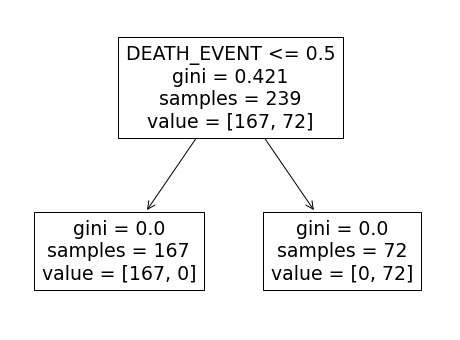

In [165]:
plot_tree(classifier,feature_names=data.columns[1:])
plt.show()

In [166]:
classifier = classifier.predict(x_test)
classifier

array([0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0.])

In [167]:
for i in range(len(y_test)):
  print(y_test.iloc[i],'\t',classifier[i])

0.0 	 0.0
1.0 	 1.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
1.0 	 1.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0


**6. Avaliação do classificador**

In [168]:
from sklearn.metrics import accuracy_score

In [169]:
accuracy = accuracy_score(y_test, classifier)
accuracy

1.0

In [170]:
from sklearn.metrics import precision_score

In [171]:
precision = precision_score(y_test, classifier)
precision

1.0

In [172]:
from sklearn.metrics import recall_score

In [173]:
recall = recall_score(y_test, classifier)
recall

1.0

In [174]:
from sklearn.metrics import f1_score

In [175]:
f1 = f1_score(y_test, classifier)
f1

1.0

**Curva ROC**

In [176]:
from sklearn.metrics import roc_curve

In [177]:
fpr, tpr, _ = roc_curve(y_test, classifier)

In [178]:
fpr

array([0., 0., 1.])

In [179]:
tpr

array([0., 1., 1.])

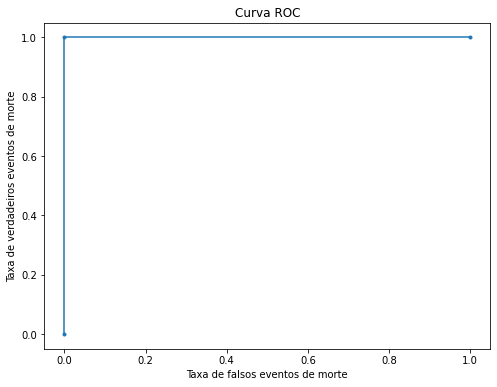

In [205]:
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.ylabel('Taxa de verdadeiros eventos de morte')
plt.xlabel('Taxa de falsos eventos de morte')
plt.show()

**Área sob a curva**

In [181]:
from sklearn.metrics import roc_auc_score

In [182]:
error = roc_auc_score(y_test, classifier)
error

1.0

**Validação cruzada**

In [183]:
from sklearn.model_selection import KFold

In [184]:
k_f = KFold(n_splits = 5)

In [185]:
for train,test in k_f.split(x):
  print('Treino:',train,'\nTeste',test)
  print()

Treino: [ 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298] 
Teste [ 0  1  2  3  

In [186]:
from sklearn.model_selection import cross_val_score

In [187]:
classifier = DecisionTreeClassifier()

In [188]:
scores = cross_val_score(classifier,x,y,cv=10)
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [189]:
scores.mean(), scores.std()

(1.0, 0.0)

**7. Comparando Árvore de Decisão com Random Forest**

**Método Holdout**

In [190]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [191]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [192]:
tree.score(x_test, y_test)

1.0

In [193]:
forest.score(x_train, y_train)

1.0

In [194]:
clf_tree = tree.predict(x_test)

In [195]:
clf_forest = forest.predict(x_test)

In [201]:
fpr_tr, tpr_tr, _ = roc_curve(y_test, clf_tree)

In [199]:
fpr_fr, tpr_fr, _ = roc_curve(y_test, clf_forest)

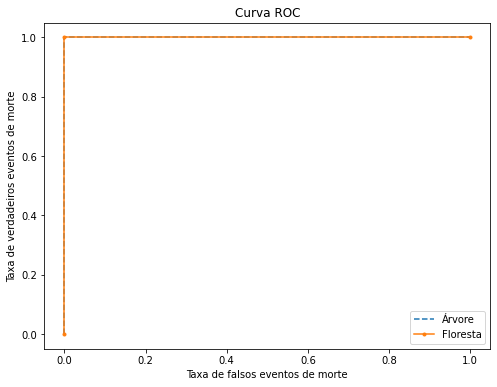

In [202]:
plt.plot(fpr_tr, tpr_tr, linestyle='--',label = 'Árvore')
plt.plot(fpr_fr, tpr_fr, marker='.',label='Floresta')
plt.title('Curva ROC')
plt.ylabel('Taxa de verdadeiros eventos de morte')
plt.xlabel('Taxa de falsos eventos de morte')
plt.legend()
plt.show()


**Validação Curzada**

In [203]:
tree = DecisionTreeClassifier()
scores = cross_val_score(tree,x,y,cv=10)
round(scores.mean(),3), round(scores.std(),3)

(1.0, 0.0)

In [204]:
forest = RandomForestClassifier()
scores = cross_val_score(forest,x,y,cv=10)
round(scores.mean(),3), round(scores.std(),3)

(1.0, 0.0)